<a href="https://colab.research.google.com/github/wahyuridho/Introduction_Image_Processing/blob/master/PCD_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAMA : Wahyu Saputro R.M.
NPM  : 5170711019

In [0]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

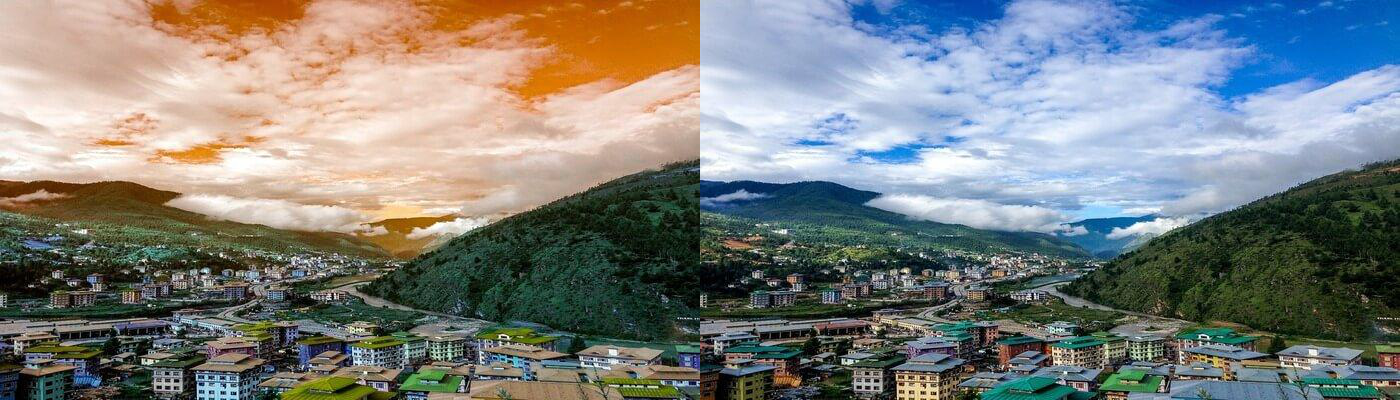

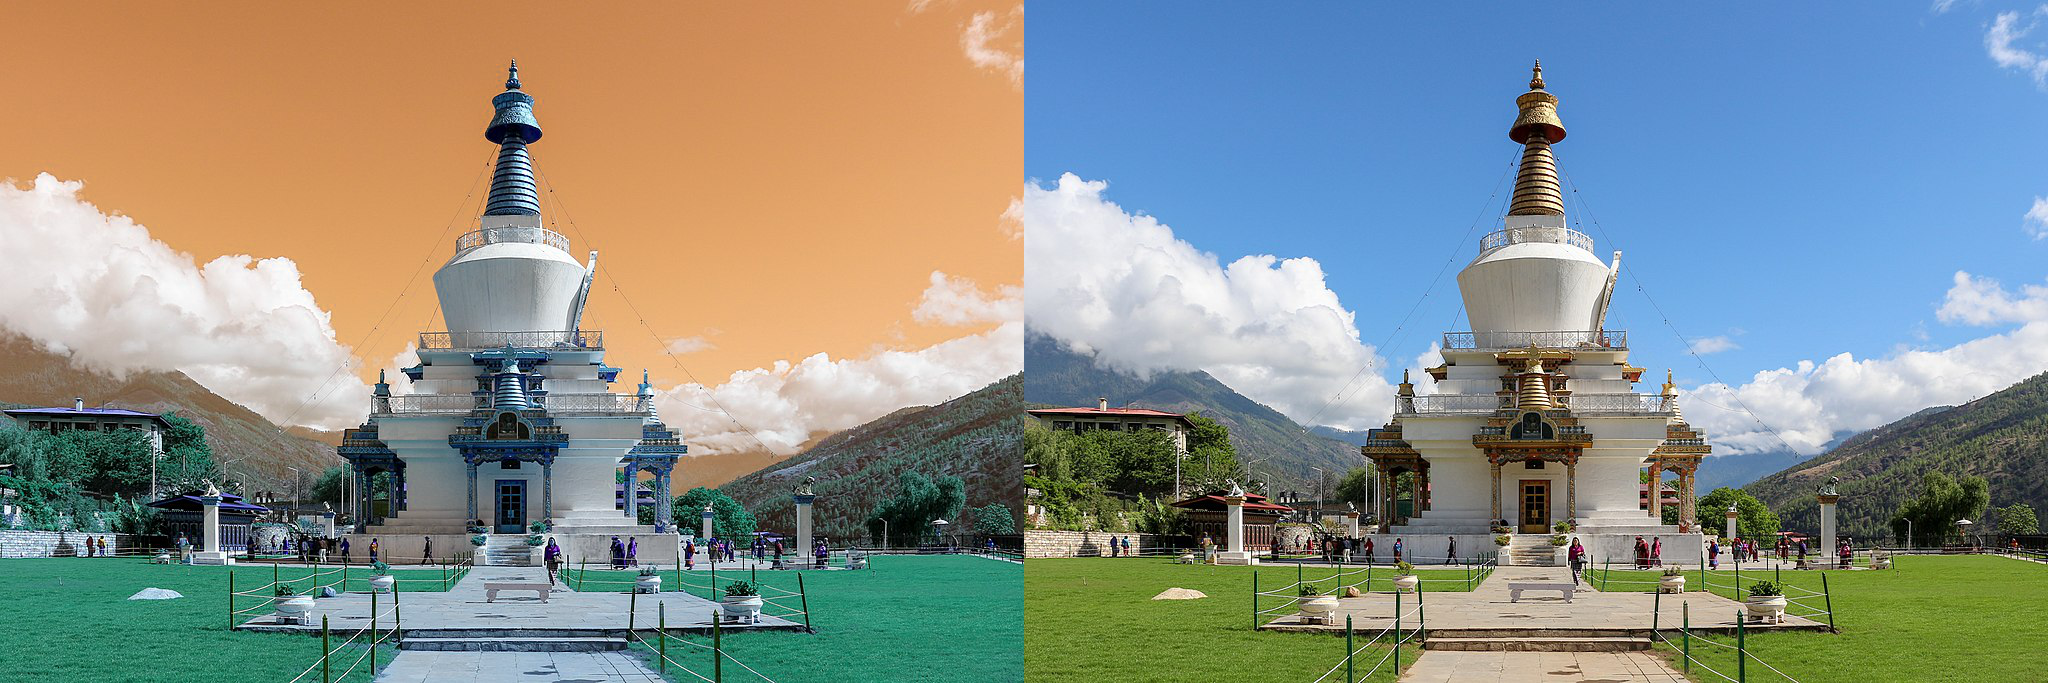

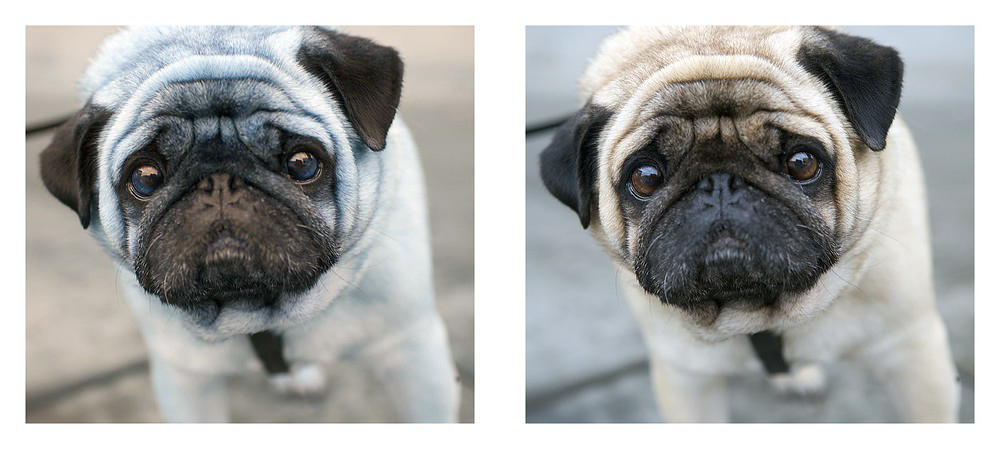

In [13]:
urls = ["https://img.traveltriangle.com/blog/wp-content/uploads/2019/06/Bhutan_Visa-cover.jpg",
        "https://upload.wikimedia.org/wikipedia/commons/thumb/3/3d/National_Memorial_Chorten%2C_Thimphu_01.jpg/1024px-National_Memorial_Chorten%2C_Thimphu_01.jpg",
        "https://farm5.staticflickr.com/4013/4470353693_519d58a2a8.jpg"]
for url in urls:
  image = io.imread(url)
  image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  final_frame = cv.hconcat((image,image_2))
  cv2_imshow(final_frame)
  print("\n")

In [14]:
print(image.dtype)
print(image.shape[0])
print(image.shape[1])
print(image.shape[2])

uint8
449
500
3


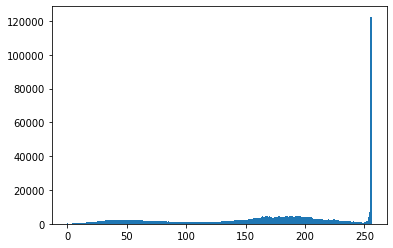

In [15]:
plt.hist(image.ravel(), bins=256, range = [0,256])
plt.show()

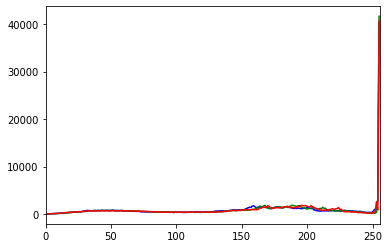

In [16]:
color = ('b','g','r')
for i,col in enumerate(color):
  histr = cv.calcHist([image],[i],None,[256],[0,256])
  plt.plot(histr,color = col)
  plt.xlim([0,256])
plt.show()

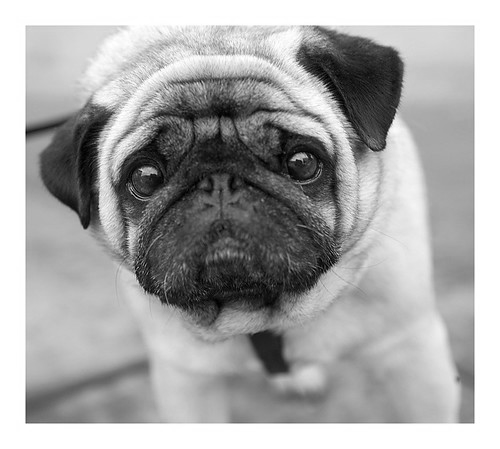

In [17]:
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

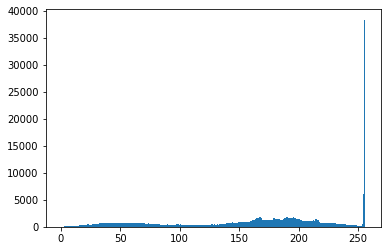

In [18]:
plt.hist(gray_image.ravel(), bins = 256, range = [0, 256])
plt.show()

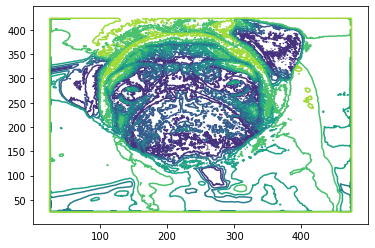

In [19]:
plt.contour(gray_image, origin = "image")

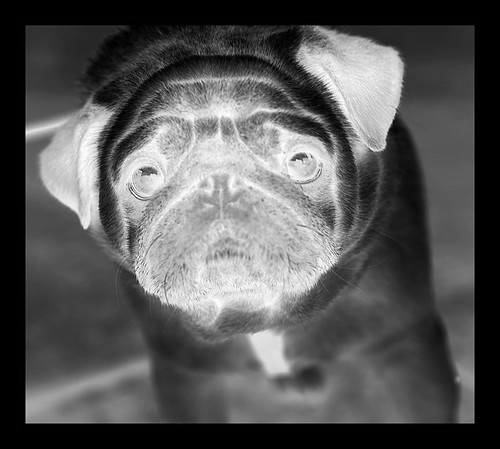

In [21]:
im2 = 255 - gray_image
cv2_imshow(im2)

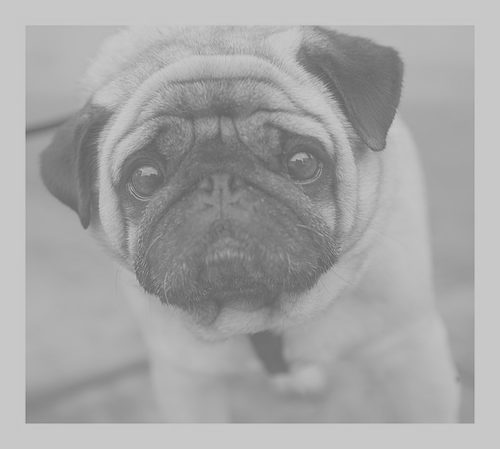

In [22]:
im3 = (100.0/255)*gray_image + 100
cv2_imshow(im3)

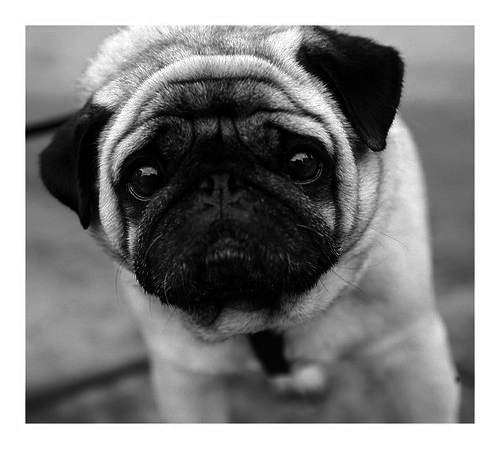

In [23]:
im4 = 255.0*(gray_image/255.0)**2
cv2_imshow(im4)

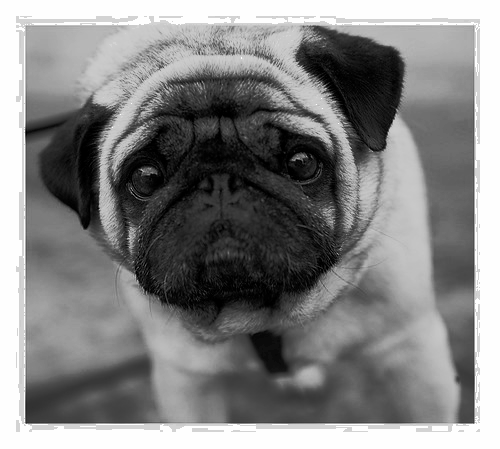

In [24]:
def histeq(im, nbr_bins = 256):
  "Histogram equalization of a grayscale image"
  imhist, bins = np.histogram(im.flatten(), nbr_bins, [0,256])
  cdf = imhist.cumsum()
  cdf = imhist.max()*cdf/cdf.max()
  cdf_mask = np.ma.masked_equal(cdf, 0)
  cdf_mask = (cdf_mask - cdf_mask.min())*255/(cdf_mask.max()-cdf_mask.min())
  cdf = np.ma.filled(cdf_mask,0).astype('uint8')
  return cdf[im.astype('uint8')]
im5 = histeq(im4)
cv2_imshow(im5)

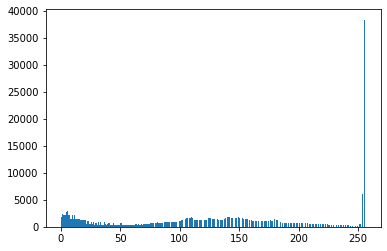

In [25]:
plt.hist(im4.ravel(),bins = 256, range = [0,256])
plt.show()

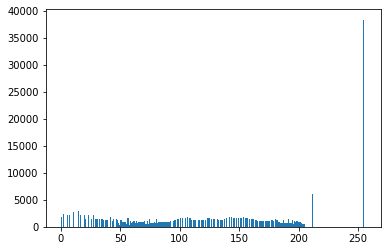

In [26]:
plt.hist(im5.ravel(),bins = 256, range = [0,256])
plt.show()

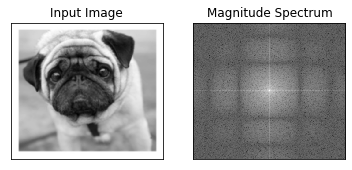

In [27]:
imBlur = cv.blur(gray_image,(5,5))
f = np.fft.fft2(imBlur)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 30*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'),plt.xticks([]), plt.yticks([])
plt.show()

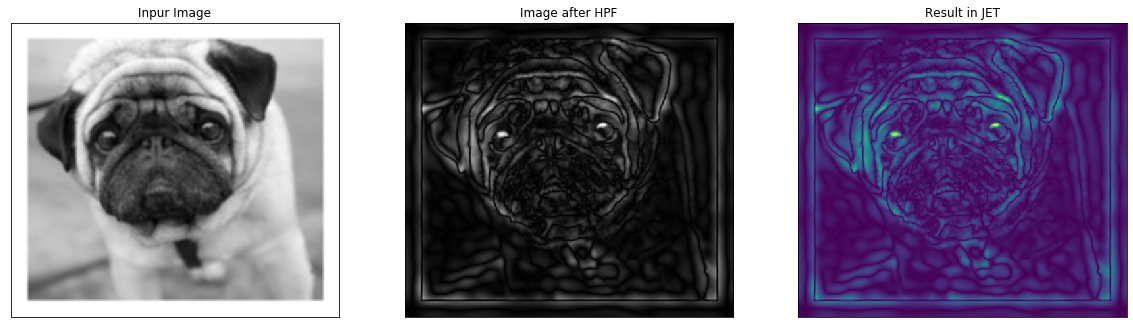

In [28]:
rows, cols = imBlur.shape
crow, ccol = round(rows/2), round(cols/2)
fshift[crow-10:crow+10, ccol-10:ccol+10] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=([20,20]))
plt.subplot(131),plt.imshow(imBlur, cmap='gray')
plt.title('Inpur Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap='gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()
